# Objectives:
* Primary:
    * to verify if there is an obvious trend in the number of attacks per year in the last 10 years of collected data;
    * to determine the top 10 most dangerous areas and activities; 
    
* Secondary:
    * to stablish case fatality rate (CFR) for the top 10 activities (as a single variable)


# Importing the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
attacks = pd.read_csv('data/attacks.csv')

# First look at the data

In [3]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
file = open('data/attacks.csv', 'rb')
file_lines = file.readlines (10000)
for i in range(5):
    print(file_lines[i].decode('latin-1'))
file.close()

Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex ,Age,Injury,Fatal (Y/N),Time,Species ,Investigator or Source,pdf,href formula,href,Case Number,Case Number,original order,,

2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303,,

2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely ,F,11,Minor injury to left thigh,N,14h00  -15h00,,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,2018.06.18,2018.06.18,6302,,

201

In [5]:
attacks = pd.read_csv('data/attacks.csv', encoding = 'latin-1', parse_dates = ['Date'])
attacks.columns = [item.lower().replace(' ', '_').replace(':','_').replace('.','_').replace('__','_').
                 replace('/','_').replace('species_','species').
                 replace('sex_','sex') for item in attacks.columns]
attacks.columns
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y_n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [6]:
attacks[~attacks['unnamed_23'].isnull()]

case_number                  date    year        type  \
4415    1952.03.30           30-Mar-1952  1952.0  Unprovoked   
5840  1878.09.14.R  Reported 14-Sep-1878  1878.0    Provoked   

                   country         area                    location  \
4415  NETHERLANDS ANTILLES      Curacao                         NaN   
5840                   USA  Connecticut  Branford, New Haven County   

                                             activity              name sex  \
4415  Went to aid of child being menaced by the shark       A.J. Eggink   M   
5840                                          Fishing  Captain Pattison   M   

      ...                                            species  \
4415  ...  Bull shark, 2.7 m [9'] was captured & dragged ...   
5840  ...                                                NaN   

                                 investigator_or_source  \
4415  J. Randall, p.352 in Sharks & Survival; H.D. B...   
5840                       St. Joseph Herald, 9/14/1878   

                            pdf  \
4415      1952.03.30-Eggink.pdf   
5840  1878.09.14.R-Pattison.pdf   

                                           href_formula  \
4415  http://sharkattackfile.net/spreadsheets/pdf_di...   
5840  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href case_number_1  \
4415  http://sharkattackfile.net/spreadsheets/pdf_di...    1952.03.30   
5840  http://sharkattackfile.net/spreadsheets/pdf_di...  1878.09.14.R   

     case_number_2 original_order unnamed_22       unnamed_23  
4415    1952.03.30         1888.0        NaN           Teramo  
5840  1878.09.14.R          463.0        NaN  change filename  

[2 rows x 24 columns]

In [7]:
attacks[~attacks['unnamed_22'].isnull()]

case_number         date    year        type country    area  \
1478  2006.05.27  27-May-2006  2006.0  Unprovoked     USA  Hawaii   

                location activity          name sex  ... species  \
1478  North Shore, O'ahu  Surfing  Bret Desmond   M  ...     NaN   

     investigator_or_source                     pdf  \
1478             R. Collier  2006.05.27-Desmond.pdf   

                                           href_formula  \
1478  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href case_number_1  \
1478  http://sharkattackfile.net/spreadsheets/pdf_di...    2006.05.27   

     case_number_2 original_order    unnamed_22 unnamed_23  
1478    2006.05.27         4825.0  stopped here        NaN  

[1 rows x 24 columns]

In [8]:
case_number_1= attacks[(attacks['case_number_1']) != (attacks['case_number'])]
case_number_2= attacks[(attacks['case_number_2']) != (attacks['case_number'])]
print(len(case_number_1))
print(len(case_number_2))


19445
19425


In [9]:
case_number_1[['case_number', 'case_number_1', 'case_number_2']]

case_number case_number_1 case_number_2
34       2018.04.03    2018.04.02    2018.04.03
117    2017.07.20.a  2017/07.20.a  2017.07.20.a
144      2017.05.06    2017.06.06    2017.05.06
217      2016.09.15    2016.09.16    2016.09.15
314    2016.01.24.b  2015.01.24.b  2016.01.24.b
...             ...           ...           ...
25718           NaN           NaN           NaN
25719           NaN           NaN           NaN
25720           NaN           NaN           NaN
25721           NaN           NaN           NaN
25722            xx           NaN           NaN

[19445 rows x 3 columns]

In [10]:
attacks_2 = attacks.copy()

# Droping columns

In [11]:
attacks_2= attacks_2.drop(['location', 'date', 'type', 'name', 'sex', 'investigator_or_source', 'pdf', 
                           'href_formula', 'href', 'case_number_1', 'case_number_2', 
                           'age', 'injury', 'time', 'unnamed_22', 'unnamed_23'], axis=1)
attacks_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_number     8702 non-null   object 
 1   year            6300 non-null   float64
 2   country         6252 non-null   object 
 3   area            5847 non-null   object 
 4   activity        5758 non-null   object 
 5   fatal_(y_n)     5763 non-null   object 
 6   species         3464 non-null   object 
 7   original_order  6309 non-null   float64
dtypes: float64(2), object(6)
memory usage: 1.6+ MB


In [12]:
attacks_2['country'] = attacks_2['country'].str.lower()
attacks_2['area'] = attacks_2['area'].str.lower().replace(' ', '_').replace(':','_').replace('.','_').replace('__','_').replace(', ','_')
attacks_2['activity'] = attacks_2['activity'].str.lower().replace(r'[^\w\s]', '').replace(r'/', '')
attacks_2['fatal_(y_n)'] = attacks_2['fatal_(y_n)'].str.lower()
attacks_2['species'] = attacks_2['species'].str.lower()

In [13]:
attacks_2.head()

case_number    year    country             area     activity fatal_(y_n)  \
0  2018.06.25  2018.0        usa       california     paddling           n   
1  2018.06.18  2018.0        usa          georgia     standing           n   
2  2018.06.09  2018.0        usa           hawaii      surfing           n   
3  2018.06.08  2018.0  australia  new south wales      surfing           n   
4  2018.06.04  2018.0     mexico           colima  free diving           n   

           species  original_order  
0      white shark          6303.0  
1              NaN          6302.0  
2              NaN          6301.0  
3        2 m shark          6300.0  
4  tiger shark, 3m          6299.0

In [14]:
attacks_2.to_csv('data/attacks_2', sep = ',', encoding = 'latin-1')

# Year: float to int

In [15]:
attacks_2 = attacks_2.fillna(value={'year': 0})
attacks_2['year'] = attacks_2['year'].apply(int)
attacks_2.info()
attacks_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_number     8702 non-null   object 
 1   year            25723 non-null  int64  
 2   country         6252 non-null   object 
 3   area            5847 non-null   object 
 4   activity        5758 non-null   object 
 5   fatal_(y_n)     5763 non-null   object 
 6   species         3464 non-null   object 
 7   original_order  6309 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.6+ MB


case_number  year    country             area     activity fatal_(y_n)  \
0  2018.06.25  2018        usa       california     paddling           n   
1  2018.06.18  2018        usa          georgia     standing           n   
2  2018.06.09  2018        usa           hawaii      surfing           n   
3  2018.06.08  2018  australia  new south wales      surfing           n   
4  2018.06.04  2018     mexico           colima  free diving           n   

           species  original_order  
0      white shark          6303.0  
1              NaN          6302.0  
2              NaN          6301.0  
3        2 m shark          6300.0  
4  tiger shark, 3m          6299.0

# Duplicates

In [16]:
sum(attacks_2.duplicated())

19411

In [17]:
attacks_2[attacks_2.duplicated()]

case_number  year country area activity fatal_(y_n) species  \
6310            0     0     NaN  NaN      NaN         NaN     NaN   
6311            0     0     NaN  NaN      NaN         NaN     NaN   
6312            0     0     NaN  NaN      NaN         NaN     NaN   
6313            0     0     NaN  NaN      NaN         NaN     NaN   
6314            0     0     NaN  NaN      NaN         NaN     NaN   
...           ...   ...     ...  ...      ...         ...     ...   
25717         NaN     0     NaN  NaN      NaN         NaN     NaN   
25718         NaN     0     NaN  NaN      NaN         NaN     NaN   
25719         NaN     0     NaN  NaN      NaN         NaN     NaN   
25720         NaN     0     NaN  NaN      NaN         NaN     NaN   
25721         NaN     0     NaN  NaN      NaN         NaN     NaN   

       original_order  
6310              NaN  
6311              NaN  
6312              NaN  
6313              NaN  
6314              NaN  
...               ...  
25717             NaN  
25718             NaN  
25719             NaN  
25720             NaN  
25721             NaN  

[19411 rows x 8 columns]

In [18]:
attacks_2 = attacks_2.drop_duplicates()
attacks_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_number     6310 non-null   object 
 1   year            6312 non-null   int64  
 2   country         6252 non-null   object 
 3   area            5847 non-null   object 
 4   activity        5758 non-null   object 
 5   fatal_(y_n)     5763 non-null   object 
 6   species         3464 non-null   object 
 7   original_order  6309 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 443.8+ KB


# Exploring columns

## Year

In [19]:
len(set(attacks_2['year']))

249

In [20]:
set(attacks_2['year'])

{0,
 5,
 77,
 500,
 1543,
 1554,
 1555,
 1580,
 1595,
 1617,
 1637,
 1638,
 1642,
 1700,
 1703,
 1721,
 1723,
 1733,
 1738,
 1742,
 1748,
 1749,
 1751,
 1753,
 1755,
 1758,
 1764,
 1767,
 1771,
 1776,
 1779,
 1780,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788,
 1791,
 1792,
 1797,
 1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1807,
 1808,
 1810,
 1811,
 1812,
 1815,
 1816,
 1817,
 1818,
 1819,
 1822,
 1823,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1834,
 1835,
 1836,
 1837,
 1839,
 1840,
 1841,
 1842,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 

In [21]:
tb_year= attacks_2[attacks_2['year'].notna()]
tb_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_number     6310 non-null   object 
 1   year            6312 non-null   int64  
 2   country         6252 non-null   object 
 3   area            5847 non-null   object 
 4   activity        5758 non-null   object 
 5   fatal_(y_n)     5763 non-null   object 
 6   species         3464 non-null   object 
 7   original_order  6309 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 443.8+ KB


In [22]:
year_counts = attacks_2['year'].value_counts(dropna=True, sort=True).rename_axis('year').reset_index(name='attacks')
year_counts.sort_values(by='year', ascending=False).head(10)

year  attacks
36  2018       53
2   2017      136
3   2016      130
0   2015      143
5   2014      127
6   2013      122
9   2012      117
4   2011      128
13  2010      101
8   2009      120

### Year attacks trend / Plots

<AxesSubplot:xlabel='year'>

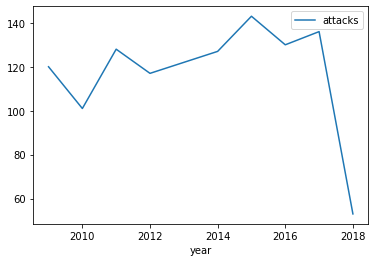

In [23]:
year_plot = year_counts[year_counts['year'] >= 2009].set_index('year').sort_values(by='year',ascending=False)                   
year_plot.plot()

* Strong decrease in number of attacks in the last year of collected data (2018):
    * Reason: 2018 data colected for half year, from January until June, as showed below;
    * 2018 is dicarded for the trend analysis based on year;
    * 2008 is inclluded for the purpous of the analysis.

In [24]:
print(attacks_2['case_number'].str.contains('2018.0[1-6]').sum())
print(attacks_2['case_number'].str.contains('2018.0[7-9]').sum())
print(attacks_2['case_number'].str.contains('2018.^[10-12]{2}$').sum())

53
0
0


In [25]:
year_counts.sort_values(by='year', ascending=False).head(11)

year  attacks
36  2018       53
2   2017      136
3   2016      130
0   2015      143
5   2014      127
6   2013      122
9   2012      117
4   2011      128
13  2010      101
8   2009      120
7   2008      122

<AxesSubplot:xlabel='year'>

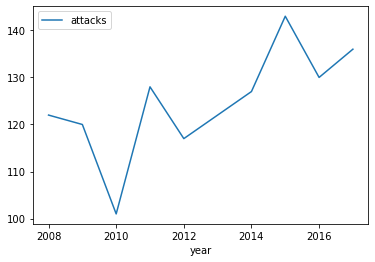

In [26]:
year_plot = year_counts[(year_counts['year'] >= 2008) & (year_counts['year'] < 2018)].set_index('year').sort_values(by='year',ascending=False)                   
year_plot.plot()


In [27]:
print(year_plot['attacks'].pct_change(-1).describe())
print(year_plot['attacks'].pct_change(-1))
(136-122)/122

count    9.000000
mean     0.019068
std      0.127812
min     -0.158333
25%     -0.085938
50%      0.040984
75%      0.046154
max      0.267327
Name: attacks, dtype: float64
year
2017    0.046154
2016   -0.090909
2015    0.125984
2014    0.040984
2013    0.042735
2012   -0.085938
2011    0.267327
2010   -0.158333
2009   -0.016393
2008         NaN
Name: attacks, dtype: float64


0.11475409836065574

* Overall, there has been a small uptrend in attacks from 2008 to 2017 (around 11,5%);
* Biggest decrease in attacks ocurred in 2010 (-15,8%)
* Biggest increase was in 2011 (26,7%)


## Activity

* Considerations:
    * the activity dataset is _extremelly_ heterogeneous and extensive;
    * particularly, "swimming" has inumerous attributes, which means this activity as described is under estimated;
    * effort has been made to minimize the impact of such variations

In [28]:
len(set(attacks_2['activity']))

1505

In [29]:
set(attacks_2['activity'].unique())


{nan,
 'the schooner tahitienne foundered in a hurricane',
 'measuring sharks',
 'fishing for white sharks',
 'native boats sunk in storm',
 'standing, washing rear wheels of his ambulance in ankle-deep water',
 'attempting to chase shark out to sea',
 'net fishing, fell into the water',
 'sinking of the cargo ship mark jason',
 'air disaster: crash of air france super constellation ',
 'aircraft ditched in the sea, swimming ashore',
 'harpooned shark',
 "fishing, stepped on hooked shark's head",
 'small boat',
 'free diving for abalone from zodiac (submerged)',
 'paddling in knee-deep water',
 'swimming/',
 'overturned skiff',
 'catching sharks under government contract',
 'cleaning hull of ship ',
 'abalone diving using hookah (resting on the surface)',
 'playing on a sandbar',
 'diving off wharf',
 'the steamships thingvalla and geiser collided',
 'spearfishing, but standing in knee-deep water',
 'diving, but on the surface when bitten by the shark',
 'wreck of the steamship sultan 

In [30]:
tb_activity = attacks_2[attacks_2['activity'].notna()]
tb_activity

case_number  year             country               area      activity  \
0     2018.06.25  2018                 usa         california      paddling   
1     2018.06.18  2018                 usa            georgia      standing   
2     2018.06.09  2018                 usa             hawaii       surfing   
3     2018.06.08  2018           australia    new south wales       surfing   
4     2018.06.04  2018              mexico             colima   free diving   
...          ...   ...                 ...                ...           ...   
6296     ND.0006     0           australia    new south wales      swimming   
6297     ND.0005     0           australia  western australia        diving   
6298     ND.0004     0           australia  western australia  pearl diving   
6299     ND.0003     0                 usa     north carolina      swimming   
6301     ND.0001     0  ceylon (sri lanka)   eastern province      swimming   

     fatal_(y_n)                                            species  \
0              n                                        white shark   
1              n                                                NaN   
2              n                                                NaN   
3              n                                          2 m shark   
4              n                                    tiger shark, 3m   
...          ...                                                ...   
6296           y  said to involve a grey nurse shark that leapt ...   
6297           y                                                NaN   
6298           y                                                NaN   
6299           y                                                NaN   
6301           y                                                NaN   

      original_order  
0             6303.0  
1             6302.0  
2             6301.0  
3             6300.0  
4             6299.0  
...              ...  
6296             7.0  
6297             6.0  
6298             5.0  
6299             4.0  
6301             2.0  

[5758 rows x 8 columns]

In [31]:
attacks_2 = attacks_2.replace(['surfng', 'kite surfing', 'freediving', 'scuba diving', 'diving',
                               'boogie boarding','skindiving', 'swimming ' ], 
                              ['surfing', 'kitesurfing', 'free diving', 'scuba diving', 'free diving',
                              'body boarding', 'free diving', 'swimming'])
    

In [32]:
attacks_2['activity'].value_counts().head(10)

surfing          972
swimming         916
fishing          431
spearfishing     333
free diving      173
bathing          162
wading           149
body boarding    109
standing          99
scuba diving      90
Name: activity, dtype: int64

In [33]:
activity_counts = attacks_2['activity'].value_counts(dropna=True, sort=True).rename_axis('activity').reset_index(name='attacks')
print(activity_counts['attacks'].describe())
activity_counts.set_index('activity').head(11)

count    1497.000000
mean        3.846359
std        38.238981
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       972.000000
Name: attacks, dtype: float64


attacks
activity              
surfing            972
swimming           916
fishing            431
spearfishing       333
free diving        173
bathing            162
wading             149
body boarding      109
standing            99
scuba diving        90
snorkeling          89

### Activity Plot

In [34]:
activity_plot = activity_counts[activity_counts['attacks'] > 89].set_index('activity').sort_values(by='attacks',ascending=False)                   
activity_plot

attacks
activity              
surfing            972
swimming           916
fishing            431
spearfishing       333
free diving        173
bathing            162
wading             149
body boarding      109
standing            99
scuba diving        90

<AxesSubplot:xlabel='activity'>

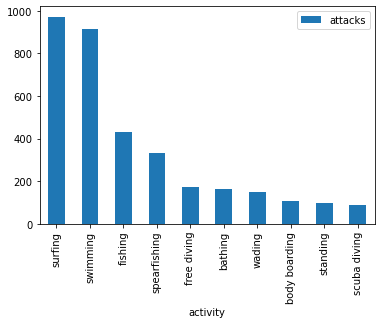

In [35]:
activity_plot.plot.bar()

### Activity Ratio

In [36]:
activity_counts['activity_ratio_attacks'] = (activity_counts['attacks'] / activity_counts['attacks'].sum()) * 100
print(activity_counts.set_index('activity').head(10).sum())
activity_counts.head(10)


attacks                   3434.000000
activity_ratio_attacks      59.638763
dtype: float64


activity  attacks  activity_ratio_attacks
0        surfing      972               16.880861
1       swimming      916               15.908301
2        fishing      431                7.485238
3   spearfishing      333                5.783258
4    free diving      173                3.004515
5        bathing      162                2.813477
6         wading      149                2.587704
7  body boarding      109                1.893018
8       standing       99                1.719347
9   scuba diving       90                1.563043

* Considering the inherent problems of this dataset:
    * the 10 most recorded activities related to attacks represents nearly 60% of the all recorded activities;
    * surfing and swimming have similiar dataset representation and accounts for around 33% of all attacks.

## Area

* Considerations:
    * the area dataset is extensive, with a small heterogeneity;
    * typo variations were fairly easily detected;
    * string corrections were made for the top 10 recorded areas.

In [37]:
len(set(attacks_2['area']))

826

In [38]:
set(attacks_2['area'])

{' kikori river mouth',
 ' la libertad',
 ' lau province',
 ' loyalty islands',
 ' manila bay',
 ' new jersey',
 ' north carolina',
 ' nusa tenggara',
 ' primorje-gorski kotar county',
 ' split-dalmatia count,',
 ' split-dalmatia county',
 ' upolu island',
 '"head of the gulf"',
 '(southwestern pacific)',
 '04.05n-13.23w',
 '1,000 miles east of hawaii',
 '1000 miles west of hawaii',
 '10ºs, 142ºe',
 '12 miles off the north coast',
 '150 miles offshore',
 '165  miles from bermuda',
 '180 miles southeast of okinawa',
 '18s / 50e',
 '19s, 178?e',
 '2 to 3 miles off taboguilla island, pacific ocean',
 '200 nm southeast of manila',
 '22ºn, 88ºe',
 '25 km off the coast of iran & 483km from mouth of persian gulf',
 "250 miles southwest of o'ahu, hawaii",
 '30 nm from singapore',
 '300 miles east of luzon',
 '300 miles east of mauritius',
 '300 miles east of st. thomas (virgin islands)',
 '300 miles from antigua',
 '330 to 350 miles east of wake island',
 '33n, 68w',
 "35º39 : 165º8'",
 '40 mi

In [39]:
attacks_2['area'] = attacks_2['area'].str.replace('florida ', 'florida')
attacks_2['area'] = attacks_2['area'].str.replace('florida straits', 'florida')
attacks_2['area'] = attacks_2['area'].str.replace('floridaStraits', 'florida')
attacks_2['area'] = attacks_2['area'].str.replace('kwazulu-natal between port edward and port st johns','kwaZulu-natal')
attacks_2['area'] = attacks_2['area'].str.replace('westerm australia', 'western australia')
attacks_2['area'] = attacks_2['area'].str.replace('eastern  province', 'eastern cape province')
attacks_2['area'] = attacks_2['area'].str.replace('eastern cape  province', 'eastern cape province')
attacks_2['area'] = attacks_2['area'].str.replace('south carolina ', 'south carolina')

In [40]:
area_counts = attacks_2['area'].value_counts(dropna=True, sort=True).rename_axis('area').reset_index(name='attacks')
area_counts.head(11)

area  attacks
0                 florida     1038
1         new south wales      486
2              queensland      311
3                  hawaii      298
4              california      290
5           kwazulu-natal      213
6   western cape province      195
7       western australia      192
8   eastern cape province      163
9          south carolina      161
10        south australia      104

In [41]:
tb_country = attacks_2[['area', 'country']].dropna()
tb_country = tb_country.groupby('area').first()
tb_country.head()

country
area                                 
 kikori river mouth  papua new guinea
 la libertad              el salvador
 lau province                    fiji
 loyalty islands        new caledonia
 manila bay               philippines

In [42]:
tb_area_country = pd.merge(area_counts, tb_country, on='area', how='left')
tb_area_country.head(11)

area  attacks       country
0                 florida     1038           usa
1         new south wales      486     australia
2              queensland      311     australia
3                  hawaii      298           usa
4              california      290           usa
5           kwazulu-natal      213  south africa
6   western cape province      195  south africa
7       western australia      192     australia
8   eastern cape province      163  south africa
9          south carolina      161           usa
10        south australia      104     australia

### Checking if data were collected for all top 10 areas in the last 10 years (2009 -2018)

In [43]:
attacks_2['data_check_2009_2018'] = np.where(attacks_2['year'] >= 2009, True, False)
year_mask = attacks_2['year'] >= 2009
attacks_2[year_mask].describe()

year  original_order
count  1177.000000     1177.000000
mean   2013.387426     5714.158879
std       2.712301      340.146621
min    2009.000000     5126.000000
25%    2011.000000     5420.000000
50%    2014.000000     5714.000000
75%    2016.000000     6008.000000
max    2018.000000     6303.000000

In [44]:
data_check_merge = pd.merge(attacks_2[year_mask], area_counts, on='area', how='inner')
data_check_merge = data_check_merge.sort_values(by='attacks', ascending=False)
data_check_merge[['area', 'attacks', 'data_check_2009_2018']].drop_duplicates().head(11)

area  attacks  data_check_2009_2018
467                florida     1038                  True
253        new south wales      486                  True
537             queensland      311                  True
114                 hawaii      298                  True
1               california      290                  True
778          kwazulu-natal      213                  True
713  western cape province      195                  True
646      western australia      192                  True
687  eastern cape province      163                  True
605         south carolina      161                  True
797        south australia      104                  True

### Area Plot

<AxesSubplot:xlabel='area'>

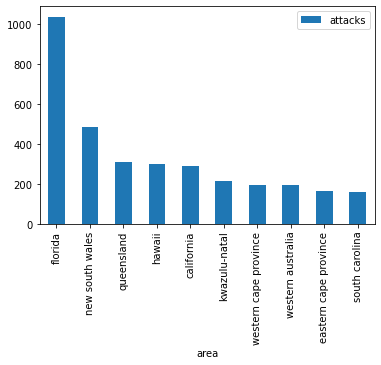

In [45]:
area_plot = area_counts[area_counts['attacks'] > 104].set_index('area').sort_values(by='attacks',ascending=False)                   
area_plot.plot.bar()

### Area Ratio

In [46]:
area_counts['area_ratio_attacks'] = (area_counts['attacks'] / area_counts['attacks'].sum()) * 100
print(area_counts.set_index('area').head(10).sum())
area_counts.head(10)

attacks               3347.000000
area_ratio_attacks      57.243031
dtype: float64


area  attacks  area_ratio_attacks
0                florida     1038           17.752694
1        new south wales      486            8.311955
2             queensland      311            5.318967
3                 hawaii      298            5.096631
4             california      290            4.959808
5          kwazulu-natal      213            3.642894
6  western cape province      195            3.335044
7      western australia      192            3.283735
8  eastern cape province      163            2.787754
9         south carolina      161            2.753549

* From 2009 to 2018 (until June 2018):
    * the 10 areas were attacks were recorded the most represent nearly 60% of the all attacks;
    * nearly 18% of all attacks recorded happened in the state of Florida (USA), followed by New South Wales (Australia), showing around 8% of the attacks

## Analysing Fatality per Activity

In [47]:
attacks_2

case_number  year    country             area     activity fatal_(y_n)  \
0      2018.06.25  2018        usa       california     paddling           n   
1      2018.06.18  2018        usa          georgia     standing           n   
2      2018.06.09  2018        usa           hawaii      surfing           n   
3      2018.06.08  2018  australia  new south wales      surfing           n   
4      2018.06.04  2018     mexico           colima  free diving           n   
...           ...   ...        ...              ...          ...         ...   
6307            0     0        NaN              NaN          NaN         NaN   
6308            0     0        NaN              NaN          NaN         NaN   
6309            0     0        NaN              NaN          NaN         NaN   
8702          NaN     0        NaN              NaN          NaN         NaN   
25722          xx     0        NaN              NaN          NaN         NaN   

               species  original_order  data_check_2009_2018  
0          white shark          6303.0                  True  
1                  NaN          6302.0                  True  
2                  NaN          6301.0                  True  
3            2 m shark          6300.0                  True  
4      tiger shark, 3m          6299.0                  True  
...                ...             ...                   ...  
6307               NaN          6309.0                 False  
6308               NaN          6310.0                 False  
6309               NaN             NaN                 False  
8702               NaN             NaN                 False  
25722              NaN             NaN                 False  

[6312 rows x 9 columns]

In [48]:
print(attacks_2['fatal_(y_n)'].describe())
print(attacks_2['fatal_(y_n)'].value_counts())


count     5763
unique       7
top          n
freq      4293
Name: fatal_(y_n), dtype: object
n          4293
y          1389
unknown      71
 n            7
m             1
n             1
2017          1
Name: fatal_(y_n), dtype: int64


In [49]:
fatal_mask = (attacks_2['fatal_(y_n)'] == 'n') | (attacks_2['fatal_(y_n)'] == 'y')
fatal_df = attacks_2[fatal_mask]

In [50]:
fatal_df['fatal_(y_n)'].value_counts()

n    4293
y    1389
Name: fatal_(y_n), dtype: int64

In [51]:
fatal_df['fatal_bool'] = np.where(fatal_df['fatal_(y_n)'] == 'y', True, False)

<ipython-input-51-ba2be3b6dbae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['fatal_bool'] = np.where(fatal_df['fatal_(y_n)'] == 'y', True, False)


In [52]:
fatal_df

case_number  year             country               area      activity  \
0     2018.06.25  2018                 usa         california      paddling   
1     2018.06.18  2018                 usa            georgia      standing   
2     2018.06.09  2018                 usa             hawaii       surfing   
3     2018.06.08  2018           australia    new south wales       surfing   
4     2018.06.04  2018              mexico             colima   free diving   
...          ...   ...                 ...                ...           ...   
6297     ND.0005     0           australia  western australia   free diving   
6298     ND.0004     0           australia  western australia  pearl diving   
6299     ND.0003     0                 usa     north carolina      swimming   
6300     ND.0002     0              panama                NaN           NaN   
6301     ND.0001     0  ceylon (sri lanka)   eastern province      swimming   

     fatal_(y_n)          species  original_order  data_check_2009_2018  \
0              n      white shark          6303.0                  True   
1              n              NaN          6302.0                  True   
2              n              NaN          6301.0                  True   
3              n        2 m shark          6300.0                  True   
4              n  tiger shark, 3m          6299.0                  True   
...          ...              ...             ...                   ...   
6297           y              NaN             6.0                 False   
6298           y              NaN             5.0                 False   
6299           y              NaN             4.0                 False   
6300           y              NaN             3.0                 False   
6301           y              NaN             2.0                 False   

      fatal_bool  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
6297        True  
6298        True  
6299        True  
6300        True  
6301        True  

[5682 rows x 10 columns]

In [53]:
tb_act_fatal = fatal_df.groupby('activity')['fatal_bool'].sum()

tb_act_fatal = pd.DataFrame(tb_act_fatal)
tb_act_fatal


fatal_bool
activity                                                      
                                                             0
                                                             0
 a canoe was pursuing a schooner that had forci...           1
"boat accident"                                              1
"climbing up to ship after repairing the stern ...           1
...                                                        ...
wreck of the uss somers                                      1
yacht of michael howell capsized                             1
yacht race                                                   0
yachting accident                                            1
yachtsman in a zodiac                                        0

[1378 rows x 1 columns]

In [54]:
tb_act_fatal.sort_values(by='fatal_bool', ascending = False).head(11)

fatal_bool
activity                  
swimming               325
bathing                 71
surfing                 49
fishing                 47
spearfishing            41
free diving             26
fell overboard          26
body boarding           17
standing                16
scuba diving            14
wading                  13

### Fatality / Actvity Plot

In [55]:

act_fatal_plot = tb_act_fatal[tb_act_fatal['fatal_bool'] > 14].sort_values(by='fatal_bool',ascending=False)                   
act_fatal_plot

fatal_bool
activity                  
swimming               325
bathing                 71
surfing                 49
fishing                 47
spearfishing            41
fell overboard          26
free diving             26
body boarding           17
standing                16

<AxesSubplot:xlabel='activity'>

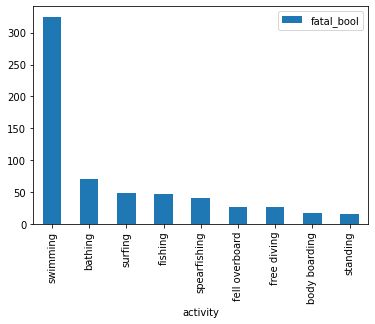

In [56]:
act_fatal_plot.plot.bar()

### Activity Fatality Ratio

In [57]:
tb_act_fatal['fatality_ratio'] = (tb_act_fatal['fatal_bool'] / tb_act_fatal['fatal_bool'].sum()) * 100
tb_act_fatal.sort_values(by='fatality_ratio', ascending = False).head(10)

fatal_bool  fatality_ratio
activity                                  
swimming               325       25.331255
bathing                 71        5.533905
surfing                 49        3.819174
fishing                 47        3.663289
spearfishing            41        3.195635
free diving             26        2.026500
fell overboard          26        2.026500
body boarding           17        1.325019
standing                16        1.247077
scuba diving            14        1.091193

* Swimming accounts for a quarter of all attacks recorded;
* Although surfing represents 17% of the attacks, it counts for around 4% of total fatalities

### Activity Fatality Rate

In [58]:
merge_fatal_rate = pd.merge(tb_act_fatal, activity_counts, on = 'activity', how = 'inner' )
merge_fatal_rate.sort_values(by='fatal_bool', ascending = False).head(10)

activity  fatal_bool  fatality_ratio  attacks  \
1082        swimming         325       25.331255      916   
98           bathing          71        5.533905      162   
1048         surfing          49        3.819174      972   
381          fishing          47        3.663289      431   
946     spearfishing          41        3.195635      333   
534      free diving          26        2.026500      173   
350   fell overboard          26        2.026500       32   
141    body boarding          17        1.325019      109   
1004        standing          16        1.247077       99   
847     scuba diving          14        1.091193       90   

      activity_ratio_attacks  
1082               15.908301  
98                  2.813477  
1048               16.880861  
381                 7.485238  
946                 5.783258  
534                 3.004515  
350                 0.555749  
141                 1.893018  
1004                1.719347  
847                 1.563043

In [59]:
merge_fatal_rate['fatality_rate'] = (merge_fatal_rate['fatal_bool'] / merge_fatal_rate['attacks']) * 100

In [60]:
merge_fatal_rate.sort_values(by='attacks', ascending = False).head(10)

activity  fatal_bool  fatality_ratio  attacks  \
1048        surfing          49        3.819174      972   
1082       swimming         325       25.331255      916   
381         fishing          47        3.663289      431   
946    spearfishing          41        3.195635      333   
534     free diving          26        2.026500      173   
98          bathing          71        5.533905      162   
1296         wading          13        1.013250      149   
141   body boarding          17        1.325019      109   
1004       standing          16        1.247077       99   
847    scuba diving          14        1.091193       90   

      activity_ratio_attacks  fatality_rate  
1048               16.880861       5.041152  
1082               15.908301      35.480349  
381                 7.485238      10.904872  
946                 5.783258      12.312312  
534                 3.004515      15.028902  
98                  2.813477      43.827160  
1296                2.587704       8.724832  
141                 1.893018      15.596330  
1004                1.719347      16.161616  
847                 1.563043      15.555556

In [66]:
merge_fatal_rate_plot = merge_fatal_rate[['attacks', 'activity', 'fatal_bool', 'fatality_rate']].sort_values(by='attacks', ascending = False).head(10)
merge_fatal_rate_plot = merge_fatal_rate_plot.rename(columns={'fatal_bool' : 'fatalities', 'fatality_rate' : 'CFR'})
merge_fatal_rate_plot


attacks       activity  fatalities        CFR
1048      972        surfing          49   5.041152
1082      916       swimming         325  35.480349
381       431        fishing          47  10.904872
946       333   spearfishing          41  12.312312
534       173    free diving          26  15.028902
98        162        bathing          71  43.827160
1296      149         wading          13   8.724832
141       109  body boarding          17  15.596330
1004       99       standing          16  16.161616
847        90   scuba diving          14  15.555556

<AxesSubplot:xlabel='activity'>

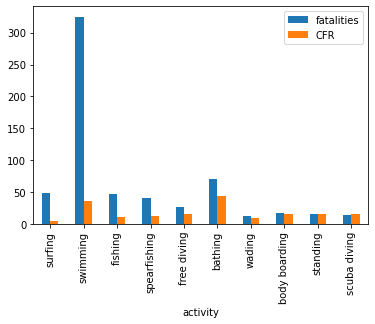

In [74]:
merge_fatal_rate_plot[['activity', 'fatalities', 'CFR']].plot.bar('activity')


In [ ]:
merge_fatal_rate.sort_values(by='attacks', ascending = False).head(10).describe()

* Activity CFR, considering the top 10 activitie in absolute number of attacks:
    * if you're attacked while swimming, you have a non-survival rate of 35%;
    * while surfing accounts for the biggest number of attacks, the CFR for this activity is 5%, the lowest among the top 10 activities;
    * the highest CFR among is bathing: 43.8%
    * the mean CFR is 17.9%